<a href="https://colab.research.google.com/github/kenken0830/Graphing/blob/main/ImageColorize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

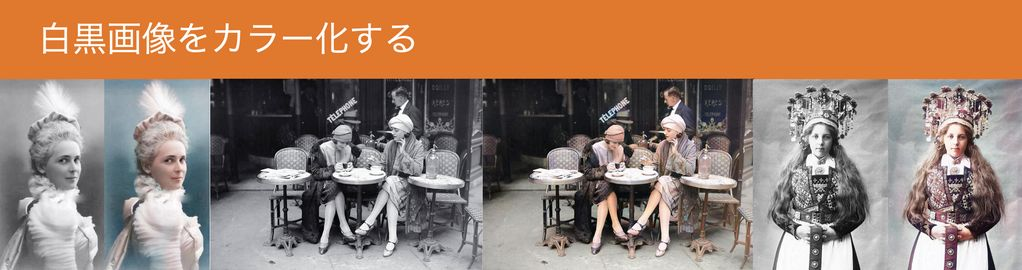

In [1]:
#@title **1.セットアップ**

# widget_manager version_down
!pip install "ipywidgets>=7,<8"
from google.colab import output
output.enable_custom_widget_manager()

! git clone https://github.com/sugi-san/DeOldify.git 
%cd DeOldify

#NOTE:  This must be the first call in order to work properly!
from deoldify import device
from deoldify.device_id import DeviceId

#choices:  CPU, GPU0...GPU7
device.set(device=DeviceId.GPU0)
import torch
if not torch.cuda.is_available():
    print('GPU not available.')

# install library
! pip install -r colab_requirements.txt

# import library
import fastai
from deoldify.visualize import *
import warnings
warnings.filterwarnings("ignore", category=UserWarning, message=".*?Your .*? set is empty.*?")

# download models
! mkdir 'models'
! wget https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth -O ./models/ColorizeArtistic_gen.pth
! wget https://data.deepai.org/deoldify/ColorizeVideo_gen.pth -O ./models/ColorizeVideo_gen.pth

# download watermark
! wget https://media.githubusercontent.com/media/jantic/DeOldify/master/resource_images/watermark.png -O ./resource_images/watermark.png

# load model
colorizer = get_image_colorizer(artistic=True)
colorizer_video = get_video_colorizer()

# define function
from function import *

# make folder
reset_folder('compare_images')
reset_folder('download')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 5.0 MB/s 
Cloning into 'DeOldify'...
remote: Enumerating objects: 2485, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 2485 (delta 1), reused 5 (delta 1), pack-reused 2480
Receiving objects: 100% (2485/2485), 149.86 MiB | 44.21 MiB/s, done.
Resolving deltas: 100% (1114/1114), done.
/content/DeOldify
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 214 kB 5.1 MB/s 
     |████████████████████████████████| 129 kB 67.6 MB/s 
     |████████████████████████████████| 1.9 MB 69.2 MB/s 
     |████████████████████████████████| 78 kB 8.5 MB/s 
     |████████████████████████████████| 355 kB 71.1 MB/s 
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=3d

--2022-10-10 11:56:33--  https://data.deepai.org/deoldify/ColorizeArtistic_gen.pth
Resolving data.deepai.org (data.deepai.org)... 5.9.140.253
Connecting to data.deepai.org (data.deepai.org)|5.9.140.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 255144681 (243M) [application/octet-stream]
Saving to: ‘./models/ColorizeArtistic_gen.pth’

./models/ColorizeAr 100%[===================>] 243.32M  28.3MB/s    in 9.2s    

2022-10-10 11:56:43 (26.5 MB/s) - ‘./models/ColorizeArtistic_gen.pth’ saved [255144681/255144681]

--2022-10-10 11:56:43--  https://data.deepai.org/deoldify/ColorizeVideo_gen.pth
Resolving data.deepai.org (data.deepai.org)... 5.9.140.253
Connecting to data.deepai.org (data.deepai.org)|5.9.140.253|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874066230 (834M) [application/octet-stream]
Saving to: ‘./models/ColorizeVideo_gen.pth’

./models/ColorizeVi 100%[===================>] 833.57M  28.6MB/s    in 30s     

2022-10-1

/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:566: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavio

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth


  0%|          | 0.00/171M [00:00<?, ?B/s]

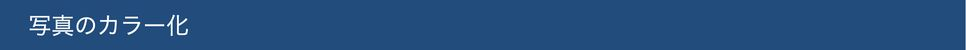

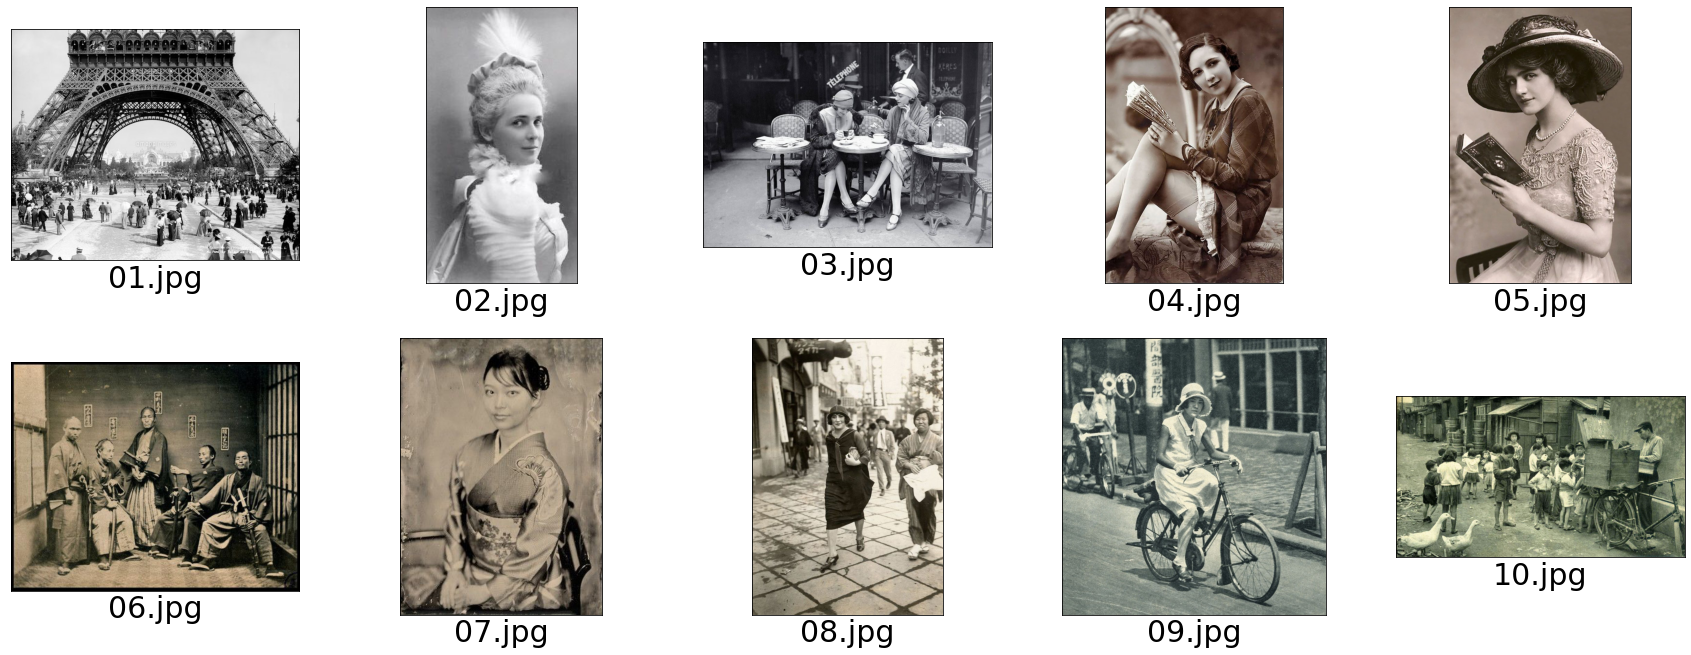

In [2]:
#@title **2.写真の表示**
display_pic('test_images')

True

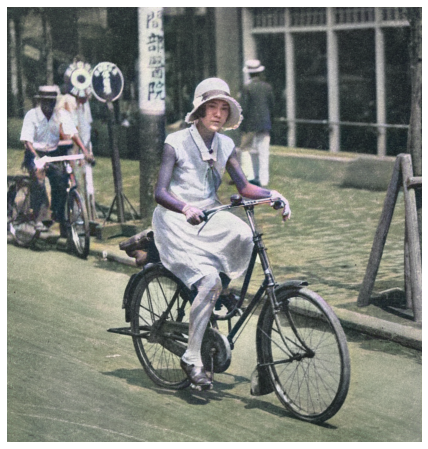

In [3]:
#@title **3.写真のカラー化**

import os
import cv2
from tqdm import tqdm
import glob

picture ='09.jpg' #@param {type:"string"}
file_path = 'test_images/'+picture

colorizer.plot_transformed_image(file_path,\
                                  render_factor=35,\
                                  watermarked = False,\
                                  display_render_factor=False,\
                                  compare=False,\
                                  figsize=(8,8))
    
mono = cv2.imread(file_path)
color = cv2.imread('result_images/'+picture)
result = cv2.hconcat([mono, color])
cv2.imwrite('compare_images/'+picture, result)
    

In [ ]:
#@title **4.画像のダウンロード**
import os
import shutil
from google.colab import files

compare = True #@param {type:"boolean"}

if (compare):
  result_path = 'compare_images/'+picture
  style = '_comp'
else:
  result_path = 'result_images/'+picture
  style = ''

download_path = 'download/'+os.path.splitext(picture)[0]+style+'_c.jpg'
shutil.copy(result_path, download_path)
files.download(download_path)

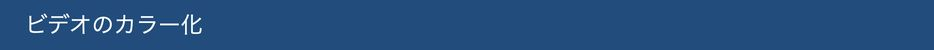

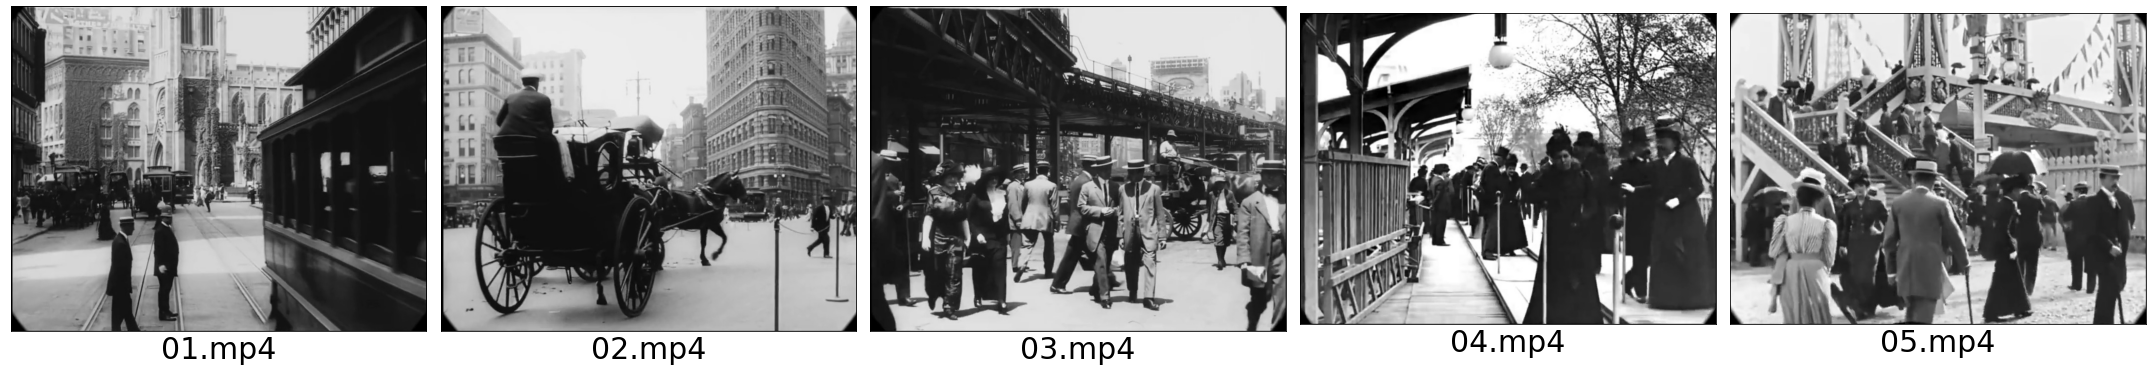

In [3]:
#@title **5.ビデオの表示**
import os
import glob

reset_folder('video/pic_video')
files = sorted(glob.glob('video/source/*.mp4'))
names = []
for file in files:
  name = os.path.basename(file)
  save_frame(name, 'video/source', 'video/pic_video')
  names.append(name)
display_movie('video/pic_video', names)



In [5]:
#@title **6.ビデオのカラー化**

video ='Produce.mp4' #@param {type:"string"}
render_factor =21  

video_path = colorizer_video.colorize_from_file_name(video,\
                                                      render_factor,\
                                                      watermarked=False)
show_video_in_notebook('video/result/'+video)

Video created here: video/result/Produce.mp4


In [7]:
#@title **7.動画のダウンロード**
import os
import shutil
from google.colab import files

download_path = 'download/'+os.path.splitext(video)[0]+'_c.mp4'
shutil.copy('video/result/'+video, download_path)
files.download(download_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

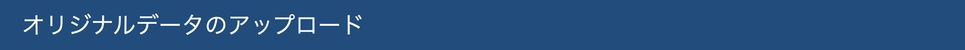

In [4]:
#@title **8.データのアップロード**
#@markdown ・selectでpicture（.jpg）かvideo（.mp4）を選択して下さい\
#@markdown ・videoはHD以下、20秒以内にして下さい
import os
import shutil
from google.colab import files
import cv2

select = 'video' #@param ["picture", "video"]

# ルートへ画像をアップロード
uploaded = files.upload()           
uploaded = list(uploaded.keys())    

# ルートから指定フォルダーへ移動
if select == 'picture':
  for file in uploaded:
      if os.path.splitext(file)[1] != '.jpg':
        break
      size_opt(file)
      shutil.move(file, 'test_images/'+file)
      
if select == 'video':
  for file in uploaded:
      if os.path.splitext(file)[1] != '.mp4':
        break
      shutil.move(file, 'video/source/'+file)

Saving Produce.mp4 to Produce.mp4


###【備考】
・ブラウザは、必ずGoogle Chromeを使用して下さい。

・動作がおかしくなった場合の対応\
１）グーグルクロームの該当タブを削除して接続を切る\
２）再度リンクを開く\
３）右上にある「ランタイム／ランタイムを接続解除して削除」をクリックする（下記写真を参照に下さい）\
４）あとは、動画にある通りの操作をすればOK

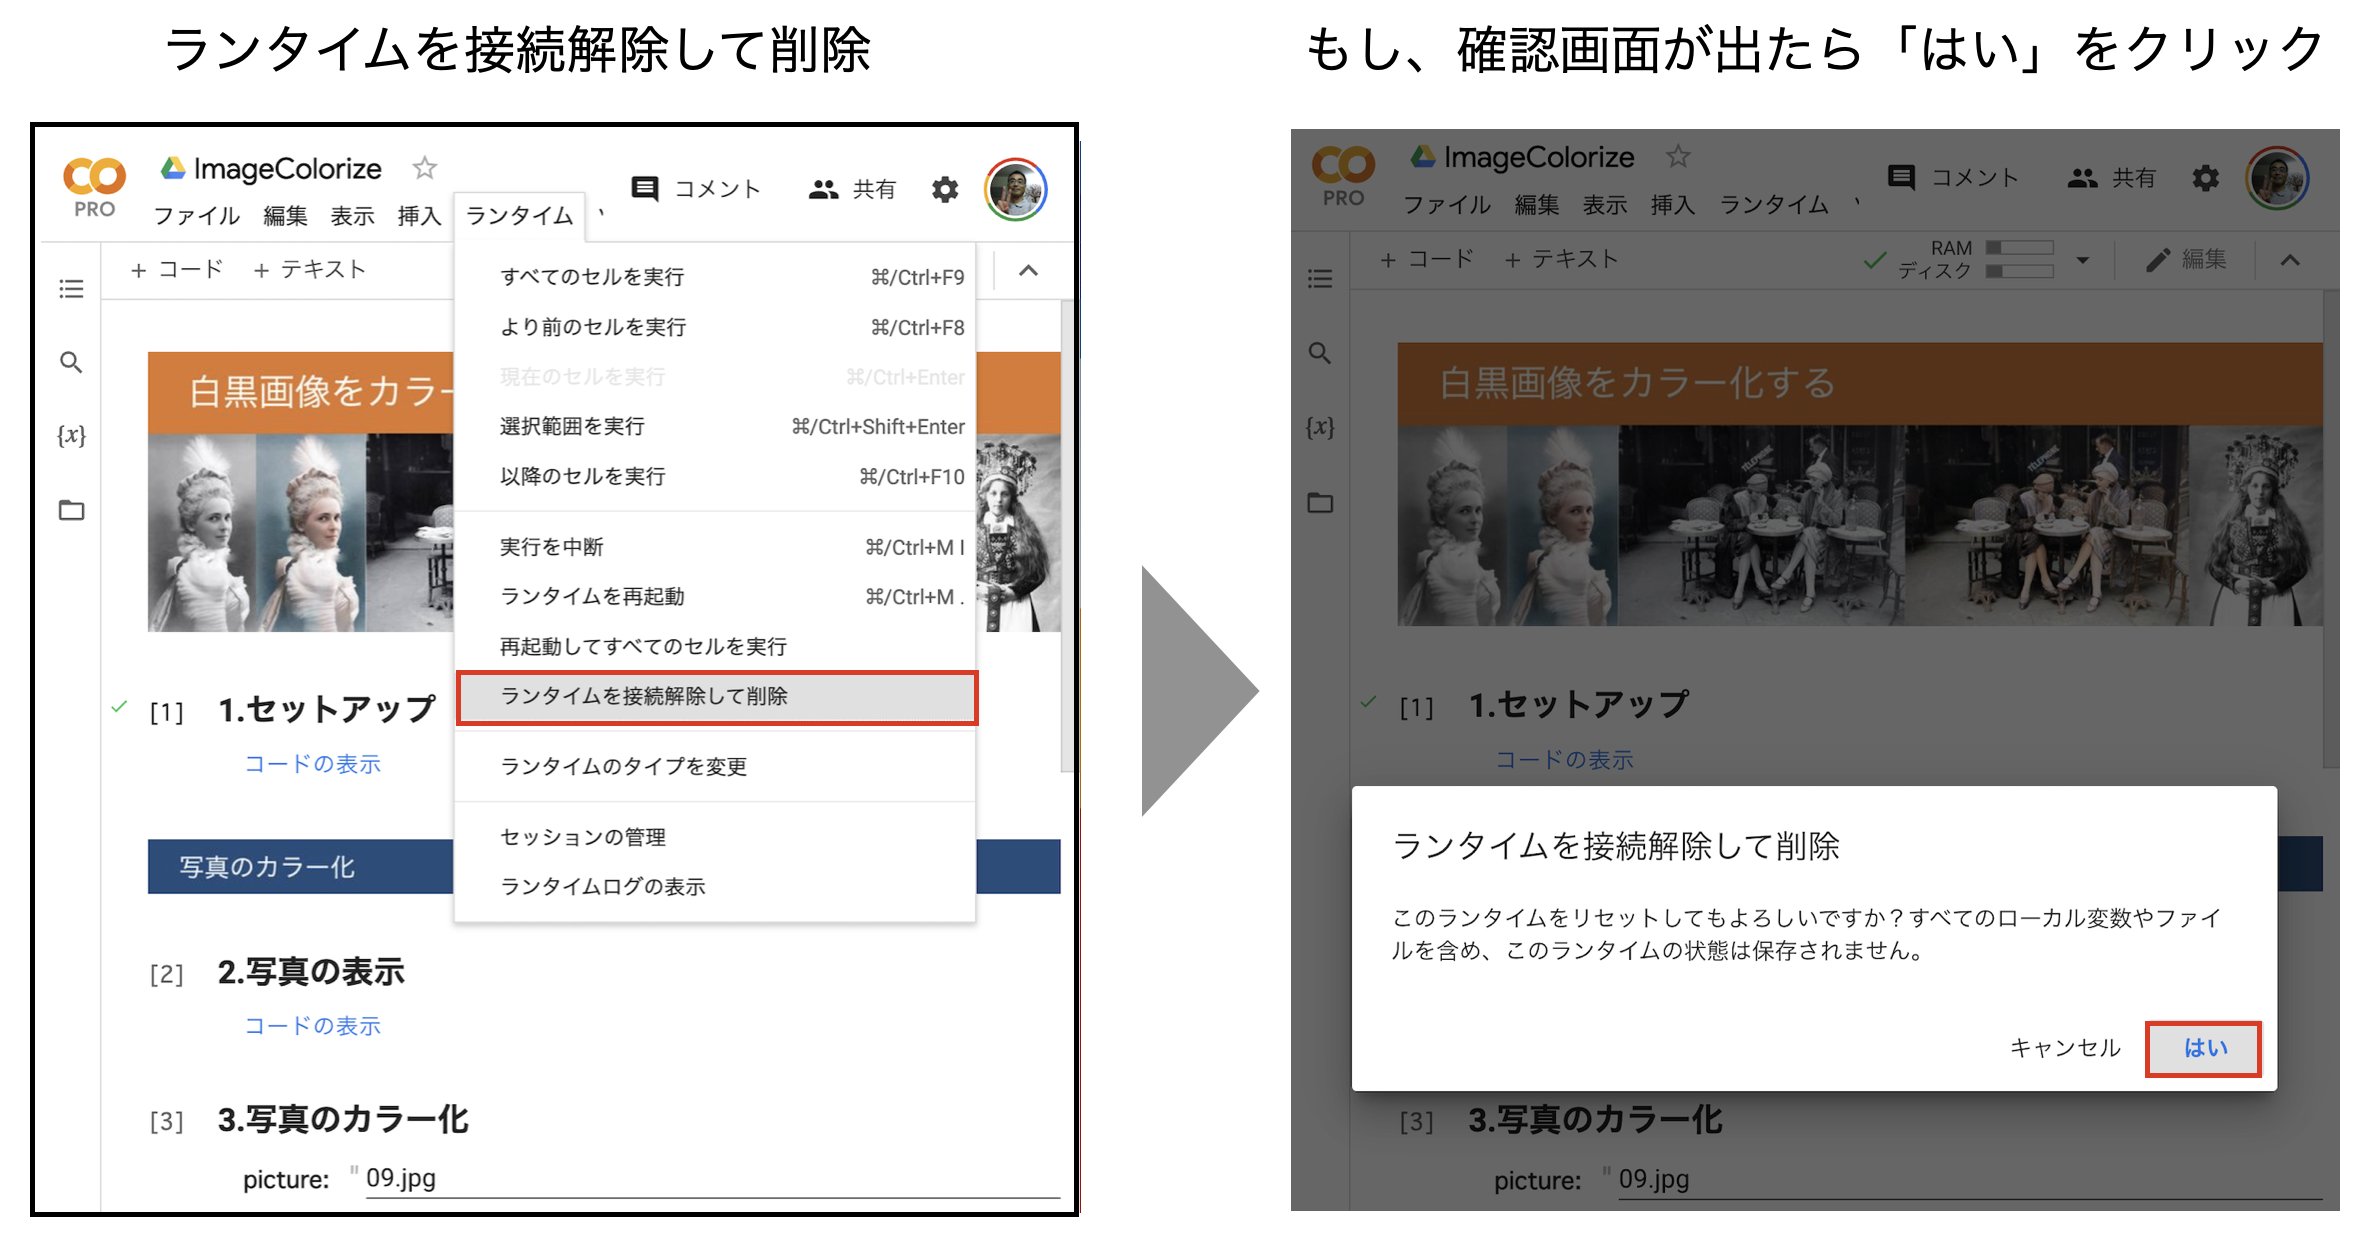